<a href="https://colab.research.google.com/github/novus-afk/FVM-1D-Steady-State-Diffusion-solver-python/blob/master/fvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''   Copyright 2021 MOHAMMED YAHYA ANSARI

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
'''

In [1]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print("\n\t\t Finite Volume Method for 1D Steady State Diffusion \n")

# Switch case for type of numerical
choice = ""
while choice != "q":
    print("""\t[ 1 ] Diffusion without Source

        [ 2 ] Diffusion with uniform source

        [ q ] Exit\n""")
    choice = input("\n\tEnter Choice :\t")

    if choice == "1":
        print("\n\t\tDiffusion Without Source\n")
        q = 0
        break
    elif choice == "2":
        print("\n\t\tDiffusion with Uniform Source\n")
        q = float(input("\n\tEnter uniform heat generation q in W/m2:   "))
        break
    elif choice == "q":
        exit()
    else:
        print("\n\n\tInvalid choice, Try again!\n")


		 Finite Volume Method for 1D Steady State Diffusion 

	[ 1 ] Diffusion without Source

        [ 2 ] Diffusion with uniform source

        [ q ] Exit


	Enter Choice :	2

		Diffusion with Uniform Source


	Enter uniform heat generation q in W/m2:   1000000


In [3]:
# input from user
n = int(input("\n\tEnter the number of grid points:   "))
l = float(input("\n\tEnter length of plate in m:   "))
tk = float(input("\n\tEnter thermal conductivity of plate in W/mK or W/mC:   "))
ta = float(input("\n\tEnter temperature at left face Ta in C:   "))
tb = float(input("\n\tEnter temperature at right face Tb in C:   "))


	Enter the number of grid points:   5

	Enter length of plate in m:   0.02

	Enter thermal conductivity of plate in W/mK or W/mC:   0.5

	Enter temperature at left face Ta in C:   100

	Enter temperature at right face Tb in C:   200


In [4]:
# create empty list
D = [0]*n
beta = [0]*n
alpha = [0]*n
c = [0]*n
A = [0]*n
C = [0]*n
temp = [0]*n

Err = [0]*n
Texact = [0]*n
g = [0]*n
g1 = [0]*n

In [5]:
# setting up equations in tdma format
dx = l/n
D[0] = (3*tk)/dx
D[1] = (2*tk)/dx
D[n-1] = (3*tk)/dx
beta[1] = tk/dx
alpha[1] = tk/dx
c[0] = ((2*tk*ta)/dx)+(q*dx)

for i in range(1, n-1):
    c[i] = q*dx

c[n-1] = ((2*tk*tb)/dx)+(q*dx)
beta[0] = 0
beta[n-1] = beta[1]
alpha[0] = alpha[1]
alpha[n-1] = 0

In [6]:
# add common value to list D, beta and alpha
for i in range(2, n-1):
    D[i] = D[1]
    beta[i] = beta[1]
    alpha[i] = alpha[1]

In [7]:
# Calculating intermediate terms by forward substitution
for i in range(0, n):
    A[i] = alpha[i]/(D[i] - beta[i]*A[i-1])
    C[i] = (beta[i]*C[i-1] + c[i])/(D[i] - beta[i]*A[i-1])

# equating last value for back substitution
temp[n-1] = C[n-1]
# Calculating Temperarure values by backward substitution
j = n-2
while j >= 0:
    temp[j] = A[j] * temp[j+1] + C[j]
    j = j-1


In [8]:
# Calculating Exact Solution and error
A1 = (-q)/(2*tk)
A2 = tb/l - ta/l + (q*l)/(2*tk)
dx = l/n

for i in range(0, n):
    g[i] = dx*0.5 + (dx * i)
    Texact[i] = A1 * g[i] * g[i] + A2 * g[i] + ta
    Err[i] = ((temp[i] - Texact[i]) * 100*2) / (temp[i] + Texact[i])
    g1[i]=g[i]#create copy of g for excel

In [9]:
# create output tuple
OUTPUT = list(zip(beta, D, alpha, c, A, C, temp, Texact, Err))

# create Pandas DataFrame
result = pd.DataFrame(data=OUTPUT, columns=["\N{GREEK SMALL LETTER BETA}", "Diagonal(D)", "\N{GREEK SMALL LETTER ALPHA}",
                      "Constant(C)", "A", "C'", "Temperature(T)", "Temperature Exact(T exact)", "% Error"])
# change index to 1,2,3,.....
result.index = result.index + 1

# print table
print("\n\n")
print(result)




       β  Diagonal(D)      α  Constant(C)         A          C'  \
1    0.0        375.0  125.0      29000.0  0.333333   77.333333   
2  125.0        250.0  125.0       4000.0  0.600000   65.600000   
3  125.0        250.0  125.0       4000.0  0.714286   69.714286   
4  125.0        250.0  125.0       4000.0  0.777778   79.111111   
5  125.0        375.0    0.0      54000.0  0.000000  230.000000   

   Temperature(T)  Temperature Exact(T exact)   % Error  
1           150.0                       146.0  2.702703  
2           218.0                       214.0  1.851852  
3           254.0                       250.0  1.587302  
4           258.0                       254.0  1.562500  
5           230.0                       226.0  1.754386  



********** Plot Graph complete **********

* * * * *   Graph Displayed   * * * * *

*****     Close Graph to Continue     *****



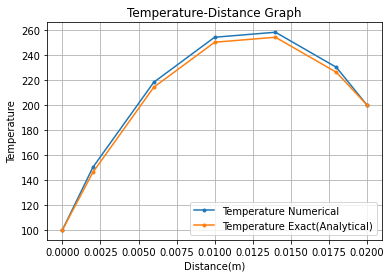

In [10]:
#plot and show graph
# adding initial and final conditions to the list, as list contains values at nodes
temp.insert(0, ta)
temp.append(tb)
Texact.insert(0, ta)
Texact.append(tb)
g.insert(0, 0)
g.append(l)

graph = pd.DataFrame({'Temperature Numerical': temp, 'Temperature Exact': Texact}, index=g)
# graph.plot()
plt.plot(graph , marker = '.')
plt.title("Temperature-Distance Graph")
plt.xlabel("Distance(m)")
plt.ylabel("Temperature")
plt.grid()
plt.legend(['Temperature Numerical', 'Temperature Exact(Analytical)'])
figure = plt.gcf()
print('''\n********** Plot Graph complete **********

* * * * *   Graph Displayed   * * * * *

*****     Close Graph to Continue     *****\n''')
plt.show()

In [ ]:



# # save choice
# while choice != "q":
#     print('''\n\t[ y ] Save result to excel file and graph to png file.
    
#         [ q ] Exit without saving result
#         ''')
#     choice = input("\nEnter your choice :\t")
#     if choice == "y":
#         result.insert(0, 'Distance(x)', g1)
#         result.insert(0, 'Node no.', range(1, 1 + len(result))) #add serial no  column at the start of the DataFrame
#         result.to_excel("output/FVM.xlsx", sheet_name = 'Output', index = False) #.to_excel to export excel file
#         figure.savefig("output/graph.png") #save graph
#         print("\n\n*************** Export complete! Check output folder. ***************\n\n")
#         break
#     elif choice == "q":
#         print("\n***** Result not saved *****")
#         break
#     else:
#         print("\n Invalid Choice, Try again !")


# # hold window
# input("\n\nPress Enter to Exit")
